MODELOS DE RNN (LSTM) PARA DEMANDA DE GAS NATURAL EN SECTOR ELÉCTRICO EN MÉXICO

Importamos la data de Demanda de gas en sector eléctrico como un CSV

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
csv_demanda_electrico_original = pd.read_csv('Demanda_electrico_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_electrico_original

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2022-05-01,3350.03
2022-06-01,3498.70
2022-07-01,3350.97


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

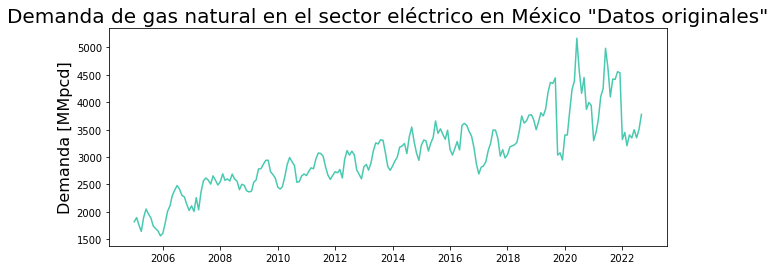

In [40]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_electrico_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector eléctrico en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual 

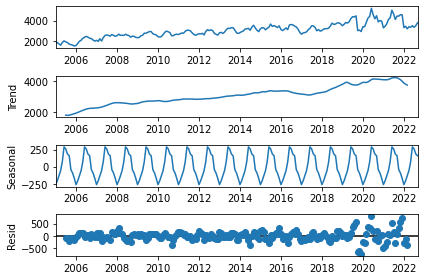

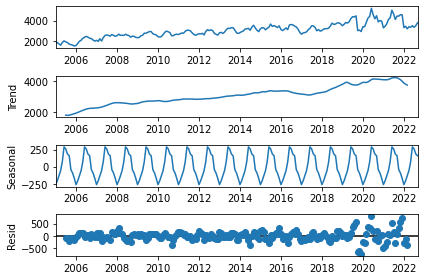

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_electrico_original_seasonal_decomposition = seasonal_decompose(csv_demanda_electrico_original)
csv_demanda_electrico_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector eléctrico en data de train y test

In [5]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
csv_demanda_electrico_original_train_data = csv_demanda_electrico_original[:-num_test_points]
csv_demanda_electrico_original_test_data = csv_demanda_electrico_original[-num_test_points:]

csv_demanda_electrico_original_train_data

,Demanded_Gas
Date,
2005-01-01,1819.58
2005-02-01,1895.33
2005-03-01,1765.86
2005-04-01,1642.70
2005-05-01,1895.54
...,...
2021-05-01,4243.93
2021-06-01,4985.53
2021-07-01,4631.85


Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc 

In [6]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
n_input = 24

# Assuming you have a column in your DataFrame named 'demand_data' that contains your time series data
data = csv_demanda_electrico_original_train_data['Demanded_Gas'].values
targets = data  # You can adjust this if your target data is different

demanda_electrico_NOscaled_train_generator = TimeseriesGenerator(data, targets, length=n_input, batch_size=1)

In [17]:
X,y = demanda_electrico_NOscaled_train_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[1819.58 1895.33 1765.86 1642.7  1895.54 2051.72 1962.05 1889.66 1739.1
 1695.92 1648.95 1560.98 1610.45 1806.33 2006.88 2108.31 2298.9  2398.88
 2480.62 2413.08 2298.49 2273.91 2134.41 2025.98]
Predict this y: 
 [2108.85]


In [18]:
X,y = demanda_electrico_NOscaled_train_generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[1895.33 1765.86 1642.7  1895.54 2051.72 1962.05 1889.66 1739.1  1695.92
 1648.95 1560.98 1610.45 1806.33 2006.88 2108.31 2298.9  2398.88 2480.62
 2413.08 2298.49 2273.91 2134.41 2025.98 2108.85]
Predict this y: 
 [2006.81]


Se importan las librerias necesarias y se define la RNN(LSTM)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
n_input = 24
n_features = 1
# define model
model_LSTM_and_Dense = Sequential()
model_LSTM_and_Dense.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_LSTM_and_Dense.add(Dense(1))
model_LSTM_and_Dense.compile(optimizer='adam', loss='mse')

In [21]:
model_LSTM_and_Dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo RNN(LSTM) + Dense Layers con el demanda_electrico_scaled_train_generator

In [23]:
model_LSTM_and_Dense.fit(demanda_electrico_NOscaled_train_generator, epochs=25)

Epoch 1/25
177/177 [==============================] - 4s 8ms/step - loss: 5106437.0000
Epoch 2/25
177/177 [==============================] - 2s 9ms/step - loss: 1279461.0000
Epoch 3/25
177/177 [==============================] - 1s 8ms/step - loss: 259886.1875
Epoch 4/25
177/177 [==============================] - 1s 8ms/step - loss: 171951.5312
Epoch 5/25
177/177 [==============================] - 1s 8ms/step - loss: 161292.6094
Epoch 6/25
177/177 [==============================] - 1s 8ms/step - loss: 104968.0000
Epoch 7/25
177/177 [==============================] - 1s 8ms/step - loss: 115343.1875
Epoch 8/25
177/177 [==============================] - 1s 7ms/step - loss: 116487.3594
Epoch 9/25
177/177 [==============================] - 1s 8ms/step - loss: 108314.5859
Epoch 10/25
177/177 [==============================] - 1s 8ms/step - loss: 101360.3125
Epoch 11/25
177/177 [==============================] - 1s 8ms/step - loss: 115011.1719
Epoch 12/25
177/177 [=============================

Se grafica la perdida por epoch 

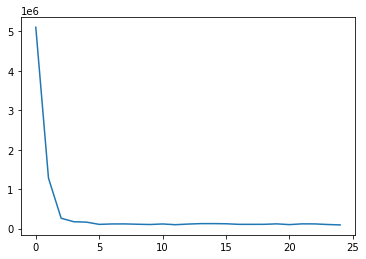

In [24]:
loss_per_epoch = model_LSTM_and_Dense.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_LSTM_and_Dense previamente definido y entrenado

Se toman los ULTIMOS n_input elementos de los datos de train y se almacenan en un batch

In [25]:
data = csv_demanda_electrico_original_train_data['Demanded_Gas'].values

demanda_electrico_NOscaled_train_batch = data[-n_input:]


demanda_electrico_NOscaled_train_batch

array([3037.44, 3076.62, 2947.09, 3402.47, 3402.47, 3819.3 , 4235.25,
       4387.91, 5168.27, 4581.99, 4163.77, 4451.61, 3869.77, 3996.14,
       3941.12, 3298.43, 3454.21, 3681.3 , 4104.82, 4243.93, 4985.53,
       4631.85, 4098.81, 4424.39])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [26]:
demanda_electrico_NOscaled_train_batch_reshaped = demanda_electrico_NOscaled_train_batch.reshape(1,n_input, n_features)
demanda_electrico_NOscaled_train_batch_reshaped

array([[[3037.44],
        [3076.62],
        [2947.09],
        [3402.47],
        [3402.47],
        [3819.3 ],
        [4235.25],
        [4387.91],
        [5168.27],
        [4581.99],
        [4163.77],
        [4451.61],
        [3869.77],
        [3996.14],
        [3941.12],
        [3298.43],
        [3454.21],
        [3681.3 ],
        [4104.82],
        [4243.93],
        [4985.53],
        [4631.85],
        [4098.81],
        [4424.39]]])

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test, dados los n_input anteriores

In [27]:
model_LSTM_and_Dense.predict(demanda_electrico_NOscaled_train_batch_reshaped)

1/1 [==============================] - 0s 486ms/step


array([[3963.2366]], dtype=float32)

Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo 

In [28]:
n_input = 24
n_features = 1

In [34]:
test_predictions_model_LSTM_and_Dense = []

first_eval_batch = csv_demanda_electrico_original_train_data['Demanded_Gas'].values[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(csv_demanda_electrico_original_test_data['Demanded_Gas'])):
    
    # get the prediction value for the first batch
    current_pred = model_LSTM_and_Dense.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions_model_LSTM_and_Dense.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 32ms/step


In [35]:
test_predictions_model_LSTM_and_Dense 

[array([3963.2366], dtype=float32),
 array([3980.5642], dtype=float32),
 array([4116.0776], dtype=float32),
 array([4309.871], dtype=float32),
 array([4220.601], dtype=float32),
 array([3808.7312], dtype=float32),
 array([4342.545], dtype=float32),
 array([4262.594], dtype=float32),
 array([4307.1616], dtype=float32),
 array([4347.6772], dtype=float32),
 array([4322.8223], dtype=float32),
 array([4196.3223], dtype=float32)]

In [31]:
csv_demanda_electrico_original_test_data

,Demanded_Gas
Date,
2021-10-01,4417.51
2021-11-01,4557.36
2021-12-01,4538.89
2022-01-01,3320.75
2022-02-01,3449.80
2022-03-01,3206.96
2022-04-01,3403.44
2022-05-01,3350.03
2022-06-01,3498.70


In [29]:
csv_demanda_electrico_original_test_data.dtypes

Demanded_Gas    float64
dtype: object

In [32]:
csv_demanda_electrico_original_test_data['Demanded_Gas'].values

array([4417.51, 4557.36, 4538.89, 3320.75, 3449.8 , 3206.96, 3403.44,
       3350.03, 3498.7 , 3350.97, 3506.42, 3778.37])

Text(0, 0.5, 'Demanda [MMpcd]')

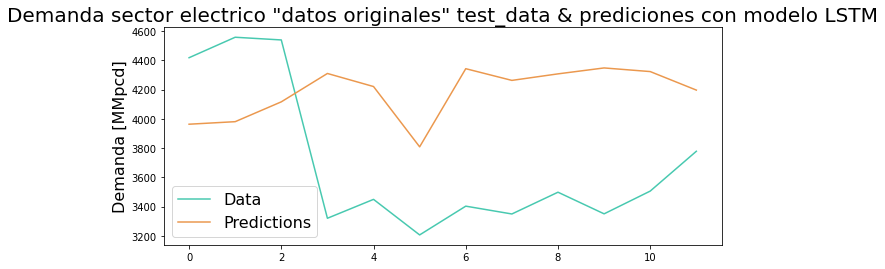

In [36]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(test_predictions_model_LSTM_and_Dense , color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo LSTM', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [37]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_test_predictions_model_LSTM_and_Dense = mean_absolute_percentage_error(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, test_predictions_model_LSTM_and_Dense)
RMSE_test_predictions_model_LSTM_and_Dense = np.sqrt(mean_squared_error(csv_demanda_electrico_original_test_data['Demanded_Gas'].values, test_predictions_model_LSTM_and_Dense))

print('MAPE:', MAPE_test_predictions_model_LSTM_and_Dense)
print('RMSE:', RMSE_test_predictions_model_LSTM_and_Dense)

MAPE: 0.2043154391226055
RMSE: 755.8315103819922
